# Laboratorio No. 6 – Análisis de tráfico de red

## Preámbulo

In [23]:
import pandas as pd
import socket
import matplotlib.pyplot as plt
from scapy.all import *

In [2]:
# Capturar 25 paquetes
paquetes = sniff(count=25)

In [3]:
# Tipo de variable
print("Tipo de la variable:", type(paquetes))

# Longitud
print("Cantidad de paquetes capturados:", len(paquetes))

# Contenido
print("Contenido de la variable:")
print(paquetes.summary())

Tipo de la variable: <class 'scapy.plist.PacketList'>
Cantidad de paquetes capturados: 25
Contenido de la variable:
Ether / IP / UDP 192.168.1.34:49153 > 255.255.255.255:6667 / Raw
Ether / IP / TCP 192.168.1.30:53798 > 140.82.112.21:https A / Raw
Ether / IP / TCP 192.168.1.30:53798 > 140.82.112.21:https A / Raw
Ether / IP / TCP 192.168.1.30:53798 > 140.82.112.21:https A / Raw
Ether / IP / TCP 192.168.1.30:53798 > 140.82.112.21:https A / Raw
Ether / IP / TCP 192.168.1.30:53798 > 140.82.112.21:https A / Raw
Ether / IP / TCP 192.168.1.30:53798 > 140.82.112.21:https A / Raw
Ether / IP / TCP 192.168.1.30:53798 > 140.82.112.21:https A / Raw
Ether / IP / TCP 192.168.1.30:53798 > 140.82.112.21:https A / Raw
Ether / IP / TCP 192.168.1.30:53798 > 140.82.112.21:https A / Raw
Ether / IP / TCP 192.168.1.30:53798 > 140.82.112.21:https A / Raw
Ether / IP / TCP 192.168.1.30:53798 > 140.82.112.21:https A / Raw
Ether / IP / TCP 140.82.112.21:https > 192.168.1.30:53798 A / Padding
Ether / IP / TCP 192.16

In [4]:
# Mostrar el primer paquete
print("Tipo de dato del primer paquete:", type(paquetes[0]))

Tipo de dato del primer paquete: <class 'scapy.layers.l2.Ether'>


In [5]:
# Mostrar contenido detallado de los primeros 5 paquetes
for i in range(5):
    print(f"\nContenido del paquete {i+1}:")
    paquetes[i].show()


Contenido del paquete 1:
###[ Ethernet ]###
  dst       = ff:ff:ff:ff:ff:ff
  src       = 68:57:2d:ac:b9:a9
  type      = IPv4
###[ IP ]###
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 200
     id        = 4169
     flags     = 
     frag      = 0
     ttl       = 255
     proto     = udp
     chksum    = 0xe911
     src       = 192.168.1.34
     dst       = 255.255.255.255
     \options   \
###[ UDP ]###
        sport     = 49153
        dport     = 6667
        len       = 180
        chksum    = 0xea46
###[ Raw ]###
           load      = b'\x00\x00U\xaa\x00\x00\x00\x00\x00\x00\x00\x13\x00\x00\x00\x9c\x00\x00\x00\x00\xd0\x97fgo3i\xeb\x10\xb5\xe9\xf12\xfd\x80*W\x0c-nW\xb6\x89\xed[\xc3\x94\x88\xef\xe7\xa7eF\xdd\xa6"\xec\xa9(F\xc0S,tI:\xf4\xc2\xb1\x97\x074[e\xf5B\xae\xad\xeb\xe9\xfe\xbd\x16\xe8\xc2\xfb\x84Y\xb1\x15_\xc7]K\xf6i\x9f\x92\xcb\xa4\xc0\xbaR\x01H\x04^v\x05\xfa\x04\x98\xdf\xeaZ\xab2\x90\x8a\xd1bn-u\x03w\x1c\xf8%VG\x0e\x82\xb8Id\xd47\x8e\xba\xdf5

## Análisis estadístico

In [6]:
# Cargar archivo pcap
paquetes_pcap = rdpcap("analisis_paquetes.pcap")

# Verificar cuántos paquetes se cargaron
print(f"Total de paquetes cargados: {len(paquetes_pcap)}")

Total de paquetes cargados: 62


In [ ]:
# Lista para guardar los datos
datos = []

for pkt in paquetes_pcap:
    if IP in pkt:
        src_ip = pkt[IP].src
        dst_ip = pkt[IP].dst
        src_port = pkt.sport if hasattr(pkt, 'sport') else None
        dst_port = pkt.dport if hasattr(pkt, 'dport') else None

        datos.append({
            "Src Address": src_ip,
            "Dst Address": dst_ip,
            "Src Port": src_port,
            "Dst Port": dst_port
        })

# Crear el DataFrame
df = pd.DataFrame(datos)

In [9]:
df.head()

,Src Address,Dst Address,Src Port,Dst Port
0,10.1.10.53,84.54.22.33,53,53
1,84.54.22.33,10.1.10.53,53,53
2,10.1.10.53,84.54.22.33,53,53
3,84.54.22.33,10.1.10.53,53,53
4,10.1.10.53,84.54.22.33,53,53


In [10]:
df[["Src Address", "Dst Address", "Src Port", "Dst Port"]]

,Src Address,Dst Address,Src Port,Dst Port
0,10.1.10.53,84.54.22.33,53,53
1,84.54.22.33,10.1.10.53,53,53
2,10.1.10.53,84.54.22.33,53,53
3,84.54.22.33,10.1.10.53,53,53
4,10.1.10.53,84.54.22.33,53,53
...,...,...,...,...
57,84.54.22.33,10.1.10.53,53,53
58,10.1.10.53,84.54.22.33,53,53
59,84.54.22.33,10.1.10.53,53,53
60,10.1.10.53,84.54.22.33,53,53


### Estadística

In [13]:
origenes_unicos = df["Src Address"].unique()
print("Lista de todas las IP origen:")
print(origenes_unicos)

Lista de todas las IP origen:
['10.1.10.53' '84.54.22.33' '75.75.75.75']


In [ ]:
destinos_unicos = df["Dst Address"].unique()
print("Lista de todas las IP destino:")
print(destinos_unicos)

Lista de todas las IP destino:
['84.54.22.33' '10.1.10.53' '75.75.75.75']


In [15]:
ip_origen_frecuente = df["Src Address"].value_counts().idxmax()
print(f"La IP origen más frecuente es: {ip_origen_frecuente}")

La IP origen más frecuente es: 10.1.10.53


In [16]:
ip_destino_frecuente = df[df["Src Address"] == ip_origen_frecuente]["Dst Address"].value_counts().idxmax()
print(f"La IP destino con la que más se comunica {ip_origen_frecuente} es: {ip_destino_frecuente}")

La IP destino con la que más se comunica 10.1.10.53 es: 84.54.22.33


In [17]:
puerto_destino_frecuente = df[df["Src Address"] == ip_origen_frecuente]["Dst Port"].value_counts().idxmax()
print(f"El puerto destino más utilizado por {ip_origen_frecuente} es: {puerto_destino_frecuente}")

El puerto destino más utilizado por 10.1.10.53 es: 53


In [20]:
try:
    servicio = socket.getservbyport(int(puerto_destino_frecuente))
except:
    servicio = "Desconocido"

print(f"El propósito del puerto {puerto_destino_frecuente} es: {servicio}")

El propósito del puerto 53 es: domain


In [21]:
puertos_origen = df[df["Src Address"] == ip_origen_frecuente]["Src Port"].unique()
print(f"La IP {ip_origen_frecuente} usa los siguientes puertos origen:")
print(puertos_origen)

La IP 10.1.10.53 usa los siguientes puertos origen:
[   53 15812 23903]


### Gráficas

In [22]:
df["Payload Size"] = df.index.map(lambda i: len(paquetes_pcap[i]) if i < len(paquetes_pcap) else 0)

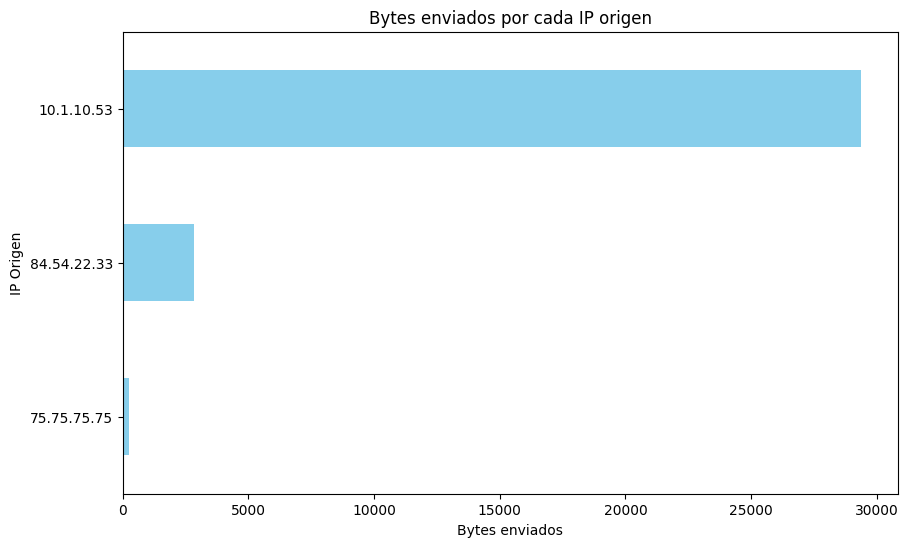

In [24]:
# Agrupar por IP origen y sumar los payloads
payload_por_ip_origen = df.groupby("Src Address")["Payload Size"].sum()

# Graficar
plt.figure(figsize=(10,6))
payload_por_ip_origen.sort_values().plot(kind="barh", color="skyblue")
plt.xlabel("Bytes enviados")
plt.ylabel("IP Origen")
plt.title("Bytes enviados por cada IP origen")
plt.show()

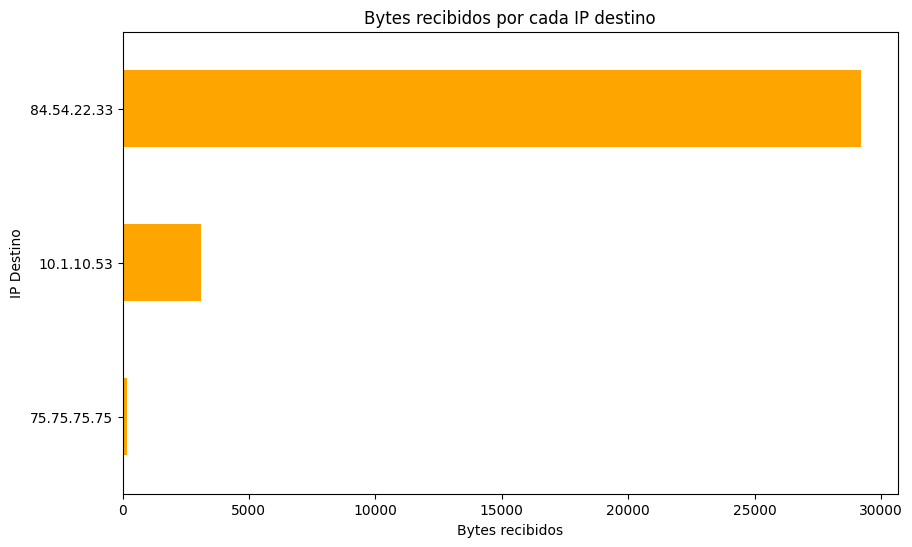

In [ ]:
# Agrupar por IP destino y sumar los payloads
payload_por_ip_destino = df.groupby("Dst Address")["Payload Size"].sum()

# Graficar
plt.figure(figsize=(10,6))
payload_por_ip_destino.sort_values().plot(kind="barh", color="orange")
plt.xlabel("Bytes recibidos")
plt.ylabel("IP Destino")
plt.title("Bytes recibidos por cada IP destino")
plt.show()

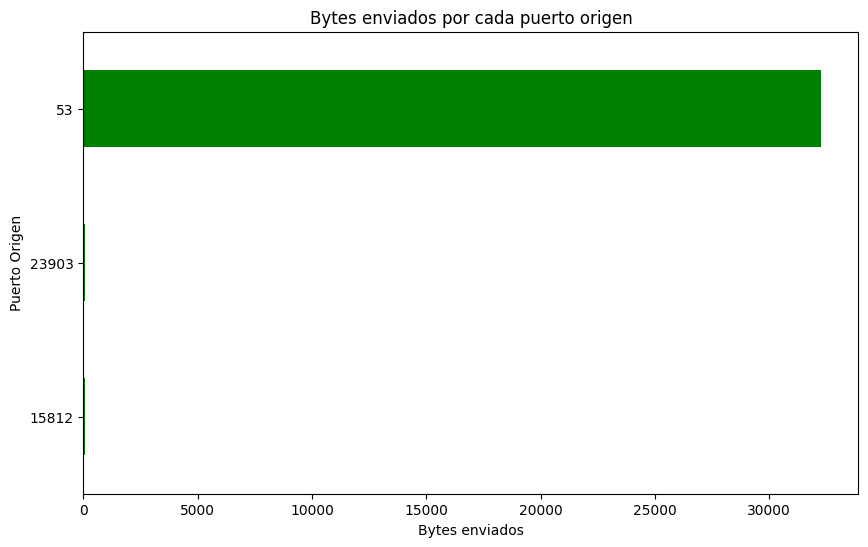

In [ ]:
# Agrupar por puerto origen y sumar los payloads
payload_por_puerto_origen = df.groupby("Src Port")["Payload Size"].sum()

# Graficar
plt.figure(figsize=(10,6))
payload_por_puerto_origen.sort_values().plot(kind="barh", color="green")
plt.xlabel("Bytes enviados")
plt.ylabel("Puerto Origen")
plt.title("Bytes enviados por cada puerto origen")
plt.show()

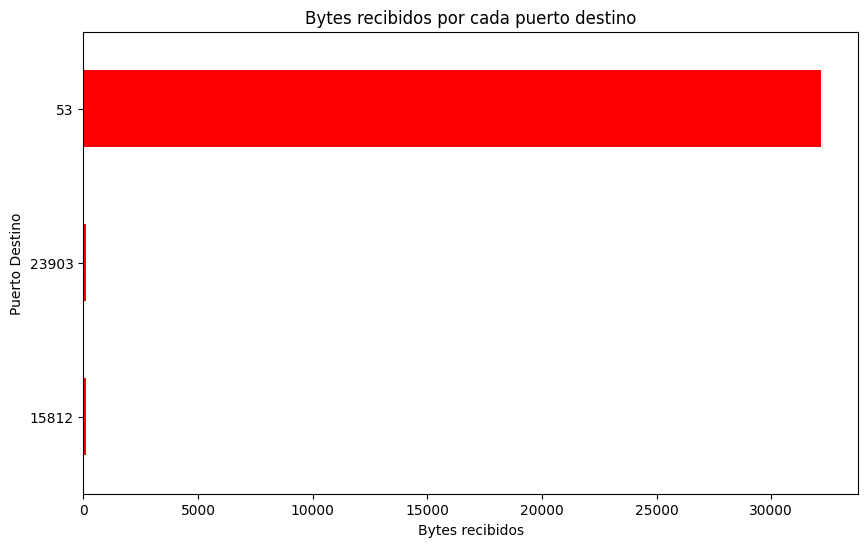

In [27]:
# Agrupar por puerto destino y sumar los payloads
payload_por_puerto_destino = df.groupby("Dst Port")["Payload Size"].sum()

# Graficar
plt.figure(figsize=(10,6))
payload_por_puerto_destino.sort_values().plot(kind="barh", color="red")
plt.xlabel("Bytes recibidos")
plt.ylabel("Puerto Destino")
plt.title("Bytes recibidos por cada puerto destino")
plt.show()

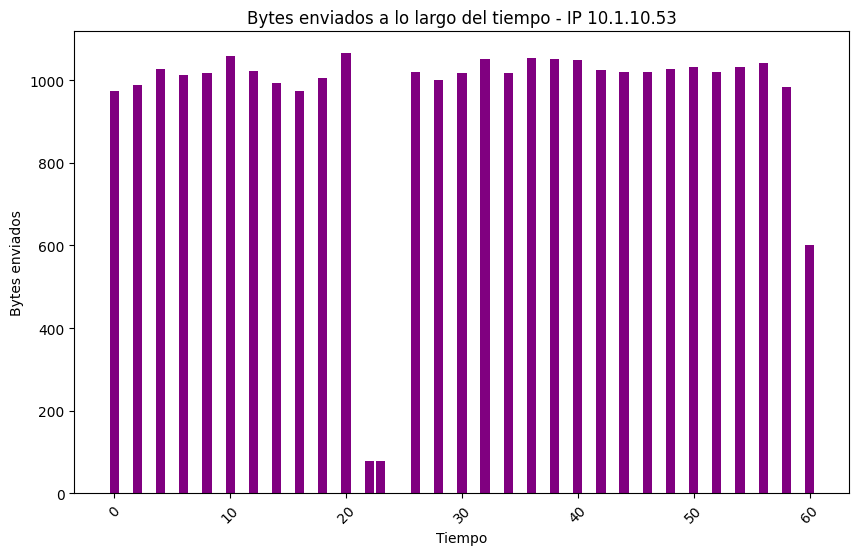

In [28]:
# Filtrar datos de la IP origen más frecuente
df_ip_frecuente = df[df["Src Address"] == ip_origen_frecuente].copy()

# Agregar una columna de tiempo 
df_ip_frecuente["Time"] = df_ip_frecuente.index

# Graficar
plt.figure(figsize=(10,6))
plt.bar(df_ip_frecuente["Time"], df_ip_frecuente["Payload Size"], color="purple")
plt.xlabel("Tiempo")
plt.ylabel("Bytes enviados")
plt.title(f"Bytes enviados a lo largo del tiempo - IP {ip_origen_frecuente}")
plt.xticks(rotation=45)
plt.show()

1. La IP 10.1.10.53 genera la mayor cantidad de tráfico enviado con aproximado de 30,000 bytes
Esto sugiere que esta IP es el principal emisor de tráfico en la red.
   - Puede ser un servidor que está enviando datos constantemente.
   - Puede estar descargando o subiendo archivos grandes.
   - Si no es un servidor, podría tratarse de actividad inusual como exfiltración de datos.

2. La IP 84.54.22.33 es la principal receptora con aproximado de 30,000 bytes
Esta IP es el principal destino del tráfico generado en la red.
   - Es probable que sea un servidor externo con el que la IP 10.1.10.53 está comunicándose de manera frecuente.
   - Podría tratarse de descargas grandes desde esa IP.
   - Si la comunicación es constante y no esperada, podría ser tráfico malicioso o una transferencia de datos sospechosa.

3. El puerto 53 es el único que envía y recibe tráfico
El puerto 53 es usado para DNS (Domain Name System).
   - Si todo el tráfico está pasando por este puerto, parece indicar una enorme cantidad de peticiones DNS.
   - Un servidor DNS en la red generando un volumen inusualmente alto de tráfico.
   - Algún dispositivo está haciendo muchas solicitudes DNS.
   - Puede ser indicio de un ataque tipo "DNS Tunneling", donde un atacante usa DNS para evadir detecciones y exfiltrar datos.

4. Análisis del tráfico en el tiempo para la IP 10.1.10.53
La mayoría de los datos enviados están cerca o por encima de 1,000 bytes.
   - La caída en el tiempo 20-30 podría ser una interrupción momentánea en la comunicación.
   - Si la IP 10.1.10.53 es un servidor, la caída podría indicar un período de inactividad.
   - El patrón podría coincidir con picos de actividad en ciertos momentos.

### Investigación del payload